### Kaggle Competetion
# Bag of Words meets Bag of Popcorn
## Tutorial 2 - Word2Vec
- 단어 임베딩 과정 시각화: [word embedding visual inspector](https://ronxin.github.io/wevi/)

### CBOW(Continuous Bag-of-Words)
- 전체 텍스트로 하나의 단어를 예측
- 작은 데이터셋일수록 유리
- 아래 예제에서 __에 들어갈 단어 예측
<pre>
1) __가 맛있다. 
2) __를 타는 것이 재미있다. 
3) 평소보다 두 __로 많이 먹어서 __가 아프다.
</pre>

### Skip-Gram 
- 타겟 단어들로부터 원본 단어를 역으로 예측하는 것
- CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리
- `배`라는 단어 주변에 올 수 있는 단어를 예측한다.
<pre>
1) *배*가 맛있다. 
2) *배*를 타는 것이 재미있다. 
3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
</pre>

In [1]:
import pandas as pd

train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('data/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
unlabeled_train.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


### Tutorial 1 에서 만든 데이터 정제를 클래스로 제작

In [4]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [5]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [6]:
sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)

In [9]:
len(sentences)

795538

In [10]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [11]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

## Word2Vec 모델을 학습

In [12]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [13]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2019-10-28 19:28:32,694 : INFO : collecting all words and their counts
2019-10-28 19:28:32,694 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-28 19:28:32,726 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2019-10-28 19:28:32,759 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2019-10-28 19:28:32,791 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2019-10-28 19:28:32,825 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2019-10-28 19:28:32,859 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2019-10-28 19:28:32,892 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2019-10-28 19:28:32,927 : INFO : PROGRESS: at sentence #70000, processed 1561579 words, keeping 29024 word types
2019-10-28 19:28:32,959 : INFO : PROGRESS: 

2019-10-28 19:28:35,182 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2019-10-28 19:28:35,214 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2019-10-28 19:28:35,247 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2019-10-28 19:28:35,279 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2019-10-28 19:28:35,313 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2019-10-28 19:28:35,347 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2019-10-28 19:28:35,383 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2019-10-28 19:28:35,415 : INFO : PROGRESS: at sentence #790000, processed 17675168 words, keeping 86666 word types
2019-10-28 19:28:35,435 : INFO : collected 86997 word types from a corpus of 177

2019-10-28 19:29:19,777 : INFO : EPOCH 4 - PROGRESS: at 28.64% examples, 910130 words/s, in_qsize 8, out_qsize 0
2019-10-28 19:29:20,780 : INFO : EPOCH 4 - PROGRESS: at 35.95% examples, 913876 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:21,780 : INFO : EPOCH 4 - PROGRESS: at 42.97% examples, 913176 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:22,784 : INFO : EPOCH 4 - PROGRESS: at 50.34% examples, 918257 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:23,795 : INFO : EPOCH 4 - PROGRESS: at 57.47% examples, 917651 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:24,799 : INFO : EPOCH 4 - PROGRESS: at 64.44% examples, 915592 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:25,804 : INFO : EPOCH 4 - PROGRESS: at 71.49% examples, 914657 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:26,806 : INFO : EPOCH 4 - PROGRESS: at 78.67% examples, 915307 words/s, in_qsize 7, out_qsize 0
2019-10-28 19:29:27,808 : INFO : EPOCH 4 - PROGRESS: at 85.79% examples, 915188 words/s, in_qsiz

In [14]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = 'model/02.300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2019-10-28 19:30:04,685 : INFO : precomputing L2-norms of word weight vectors
2019-10-28 19:30:04,713 : INFO : saving Word2Vec object under model/02.300features_40minwords_10text, separately None
2019-10-28 19:30:04,715 : INFO : not storing attribute vectors_norm
2019-10-28 19:30:04,716 : INFO : not storing attribute cum_table
2019-10-28 19:30:04,928 : INFO : saved model/02.300features_40minwords_10text


### 모델 결과 탐색

In [15]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [16]:
model.wv.doesnt_match("france england germany berlin".split())

2019-10-28 19:30:28,396 : WARNING : vectors for words {'germany', 'france'} are not present in the model, ignoring these words


'england'

In [17]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6326385736465454),
 ('ladi', 0.5242923498153687),
 ('businessman', 0.521790087223053),
 ('lad', 0.49371984601020813),
 ('millionair', 0.4919430613517761),
 ('angus', 0.46266043186187744),
 ('priest', 0.4557887315750122),
 ('men', 0.45524996519088745),
 ('doctor', 0.45474910736083984),
 ('gunman', 0.4461509883403778)]

In [18]:
model.wv.most_similar("queen")

[('princess', 0.6153169274330139),
 ('goddess', 0.5484617948532104),
 ('latifah', 0.5481052398681641),
 ('bride', 0.5413985252380371),
 ('regina', 0.535683274269104),
 ('eva', 0.5315645337104797),
 ('victoria', 0.5222865343093872),
 ('stepmoth', 0.5216196775436401),
 ('madam', 0.5201855301856995),
 ('necklac', 0.5194993019104004)]

In [19]:
# model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시 

[('unhappi', 0.4232032299041748),
 ('bitter', 0.39905646443367004),
 ('sad', 0.3966662287712097),
 ('satisfi', 0.38990557193756104),
 ('upset', 0.3861194849014282),
 ('happier', 0.37642866373062134),
 ('optimist', 0.3711892366409302),
 ('afraid', 0.36317509412765503),
 ('glad', 0.35835129022598267),
 ('comfort', 0.35761165618896484)]

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화
- t-SNE(T-Distributed Stochastic Neighboring Embedding)
- 고차원 데이터의 차원 축소와 시각화 방법

In [20]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'model/02.300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2019-10-28 19:30:50,851 : INFO : loading Doc2Vec object from model/02.300features_40minwords_10text
2019-10-28 19:30:51,683 : INFO : loading wv recursively from model/02.300features_40minwords_10text.wv.* with mmap=None
2019-10-28 19:30:51,684 : INFO : setting ignored attribute vectors_norm to None
2019-10-28 19:30:51,685 : INFO : loading vocabulary recursively from model/02.300features_40minwords_10text.vocabulary.* with mmap=None
2019-10-28 19:30:51,685 : INFO : loading trainables recursively from model/02.300features_40minwords_10text.trainables.* with mmap=None
2019-10-28 19:30:51,685 : INFO : setting ignored attribute cum_table to None
2019-10-28 19:30:51,686 : INFO : loaded model/02.300features_40minwords_10text


11986
[ 0.05152426  0.00695828  0.06649629 -0.02873814 -0.07549708  0.1056735
  0.06538361 -0.02086593  0.07727462 -0.04216173]


In [21]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [22]:
df.head(10)

,x,y
with,1.059730,-7.592987
all,-2.306740,-4.924292
this,-2.118797,-1.171238
stuff,-2.998918,2.439620
go,0.156942,3.314379
down,4.340053,-8.413735
at,2.213953,-9.202158
the,-1.643239,-6.633610
moment,-7.071559,-5.742224
mj,-8.000086,3.539825


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

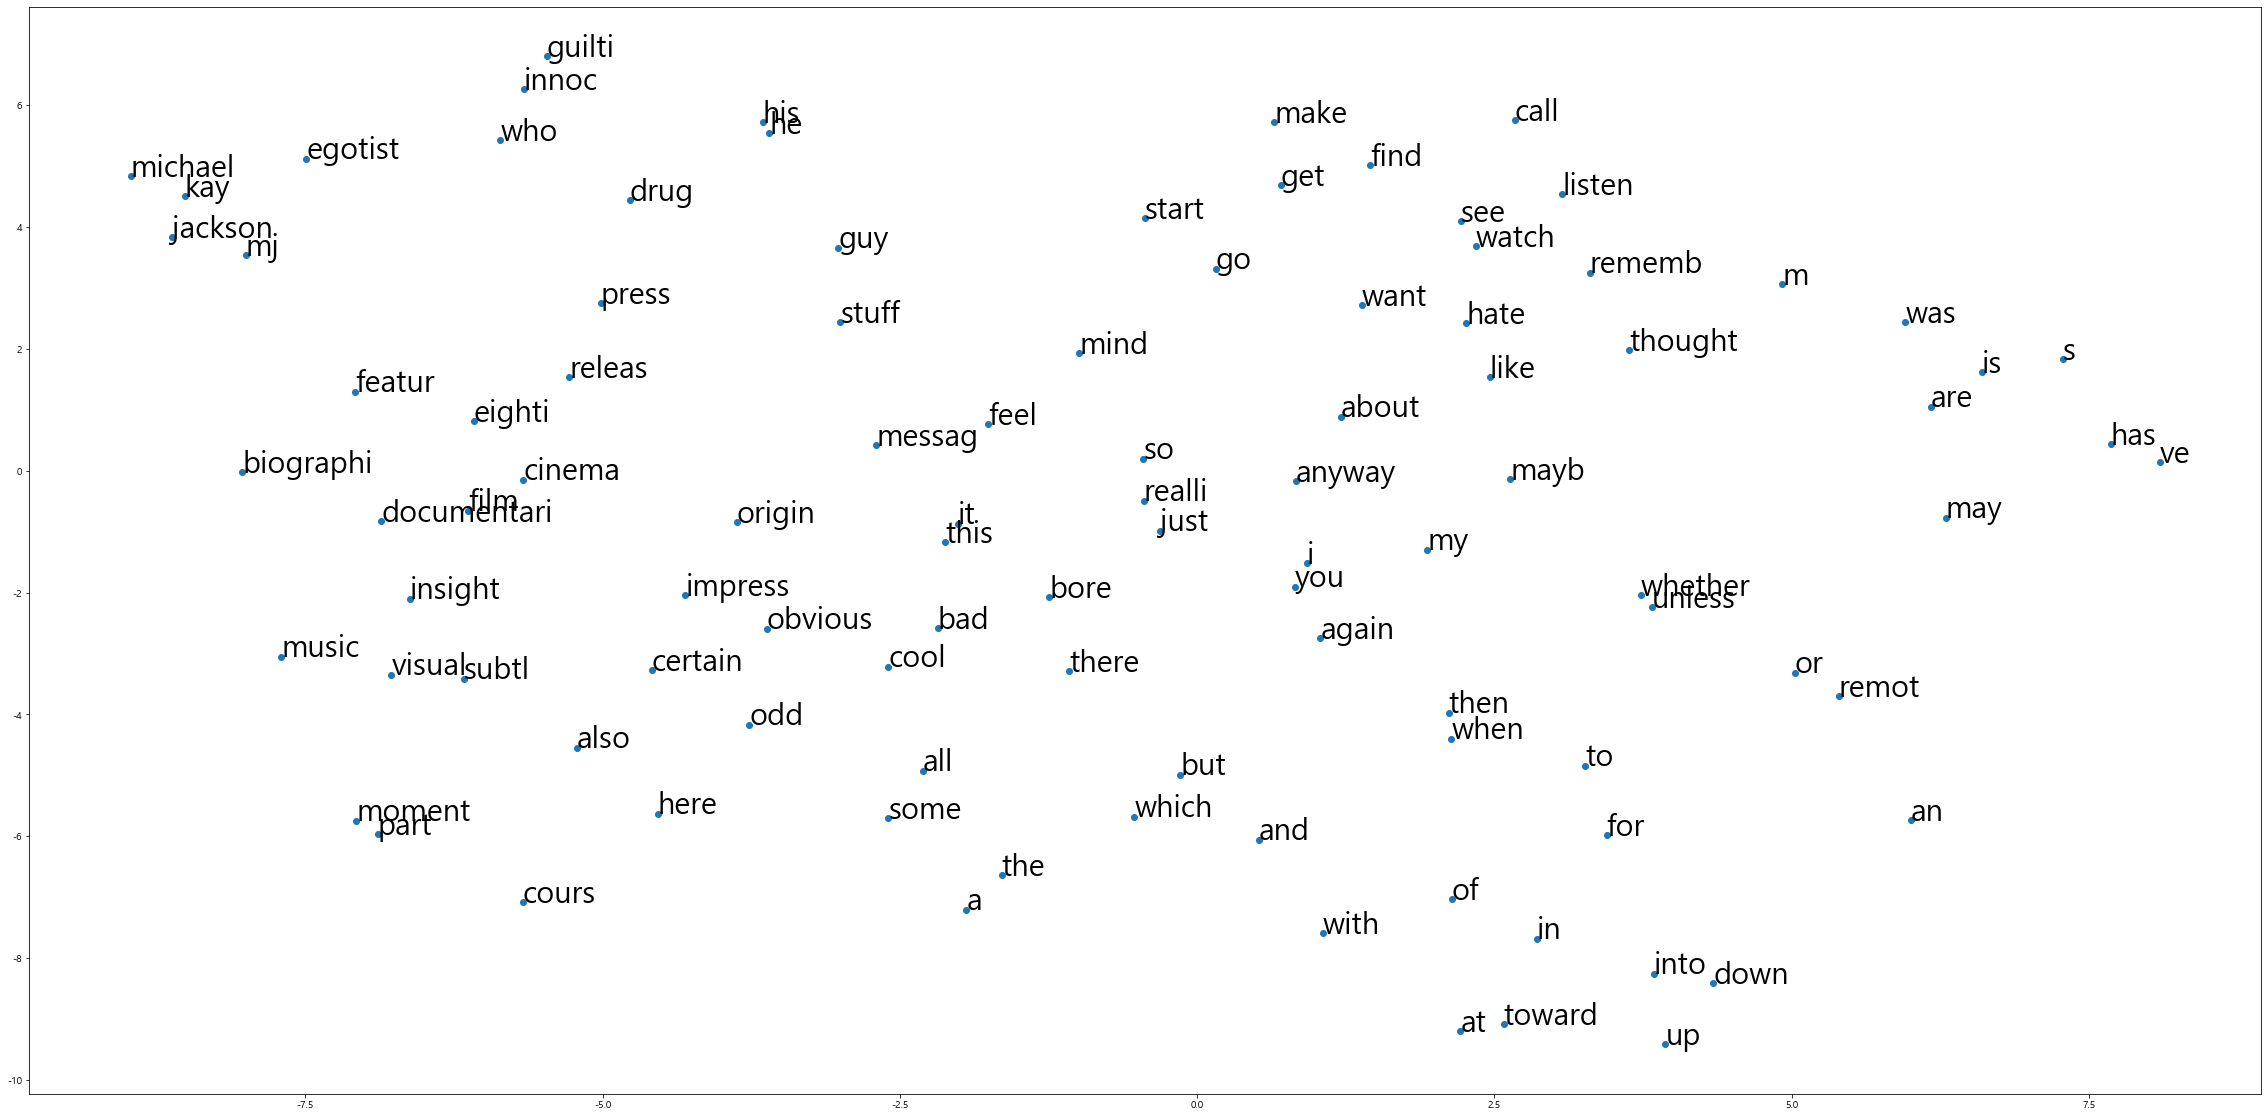

In [24]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## 평균 Feature Vector 구하기

In [30]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,), dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [25]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
           print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [26]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews), num_features), dtype="float32")
    
    for review in reviews:
       # 매 500개 리뷰마다 상태를 출력
       if counter%500. == 0.:
           print(int(counter), end=' ')
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [27]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [31]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features ) 

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 2s


In [32]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 4s


In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2019)

In [34]:
forest = forest.fit(trainDataVecs, train["sentiment"])

In [35]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 1min 31s


In [36]:
score

0.9019555840000001

In [37]:
result = forest.predict(testDataVecs)

In [38]:
output = pd.DataFrame(data={"id":test["id"], "sentiment":result})
output.to_csv('data/02.Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3)

**Kaggle competition score: 0.81556**

In [39]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

82


0    12541
1    12459
Name: sentiment, dtype: int64

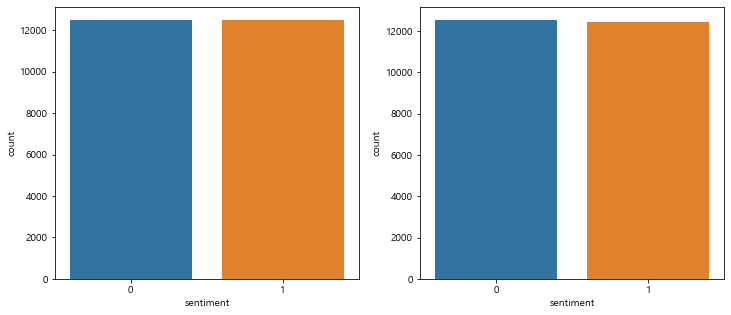

In [40]:
import seaborn as sns 

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])